In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('C:/python/Car_purchase_prediction/car_purchasing.csv' , encoding='latin-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.drop(columns=['customer name','customer e-mail'], inplace = True)

In [5]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
# converting float values to integer
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype(int)

In [7]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


In [8]:
df.isna().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
df.duplicated().sum()

0

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              500 non-null    object
 1   gender               500 non-null    int64 
 2   age                  500 non-null    int32 
 3   annual Salary        500 non-null    int32 
 4   credit card debt     500 non-null    int32 
 5   net worth            500 non-null    int32 
 6   car purchase amount  500 non-null    int32 
dtypes: int32(5), int64(1), object(1)
memory usage: 17.7+ KB


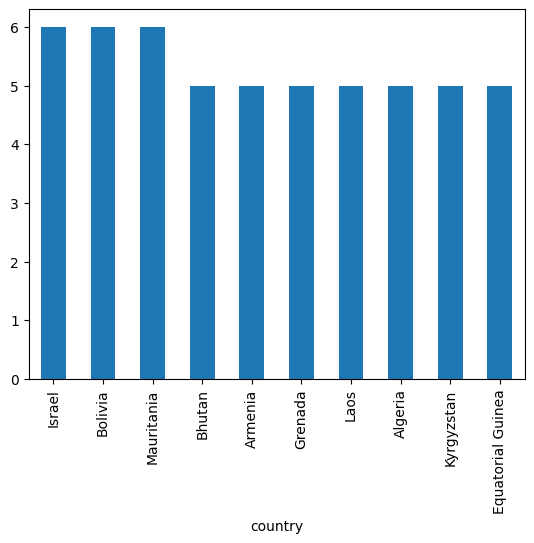

In [11]:
df['country'].value_counts().sort_values(ascending= False).head(10).plot(kind = 'bar')
plt.show()

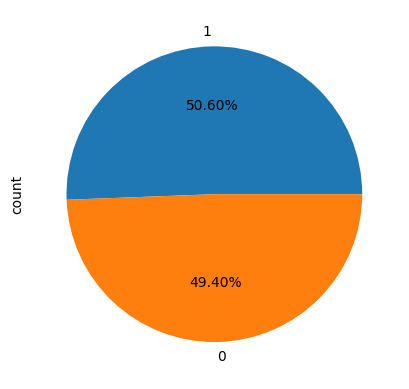

In [12]:
df['gender'].value_counts().plot(kind = 'pie',autopct = "%1.2f%%")
plt.show()
# 1 - male and 0 - female 
# there are almost same number of male and females

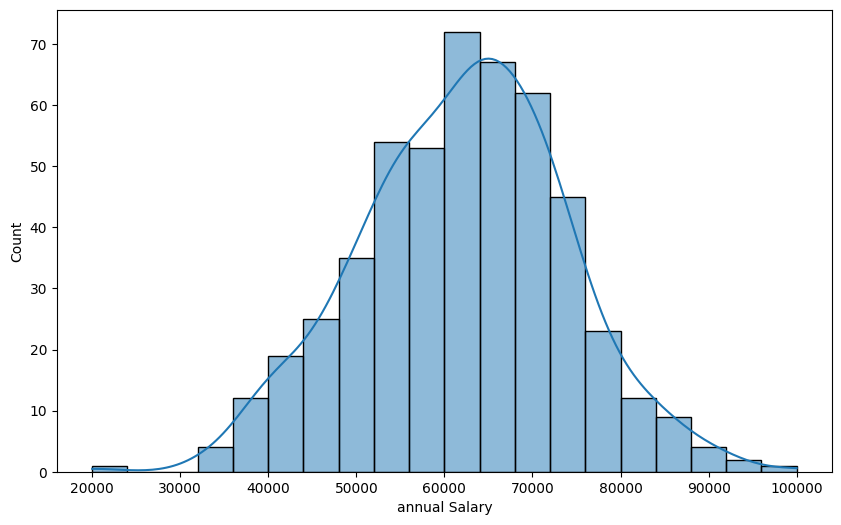

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['annual Salary'],kde= True , bins = 20)
plt.show()

In [14]:
df['annual Salary'].describe()
# Avg salary - 20000.000000

count       500.000000
mean      62126.748000
std       11703.393848
min       20000.000000
25%       54391.750000
50%       62915.000000
75%       70117.250000
max      100000.000000
Name: annual Salary, dtype: float64

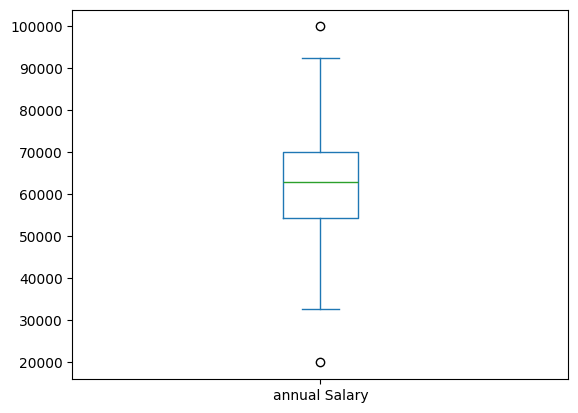

In [15]:
df['annual Salary'].plot(kind ='box')
plt.show()

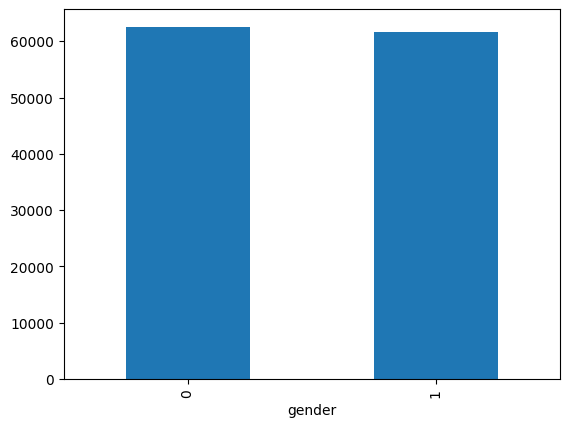

In [16]:
# gender vs annual salary
df.groupby('gender')['annual Salary'].mean().plot(kind = 'bar')
plt.show()
#  both male and female earns almost the same 

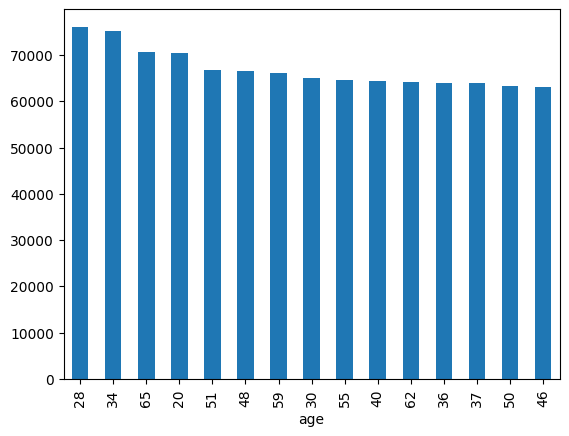

In [17]:
# age vs annual salary( 15 age with highest salary)
df.groupby('age')['annual Salary'].mean().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.show()

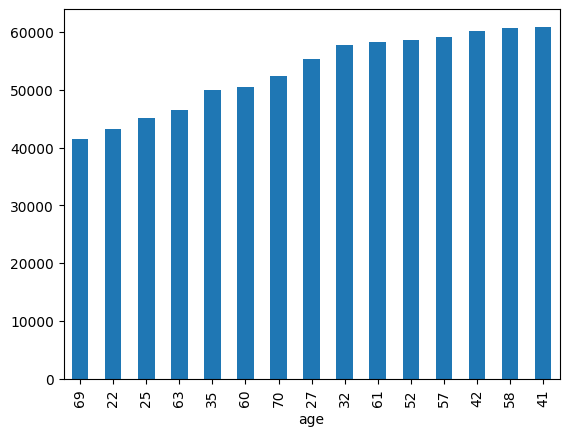

In [18]:
# age vs annual salary(15 ages that earns less)
df.groupby('age')['annual Salary'].mean().sort_values().head(15).plot(kind = 'bar')
plt.show()

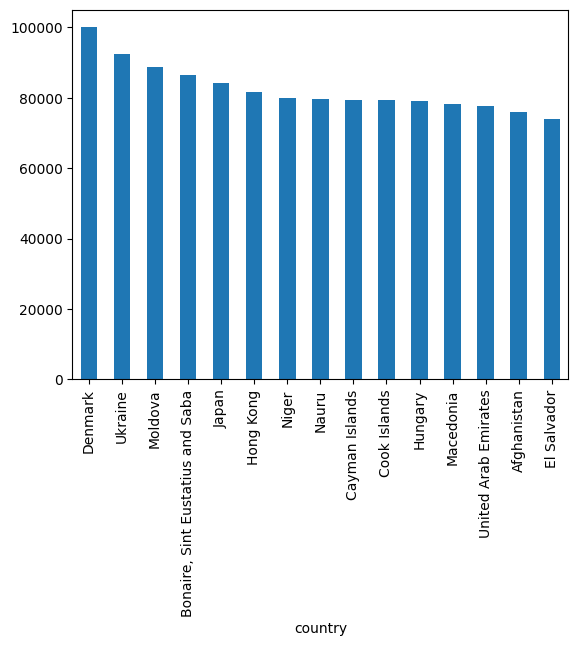

In [19]:
# country vs annual salary
df.groupby('country')['annual Salary'].mean().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.show()
# people from denmark earns the most (avg)

In [20]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


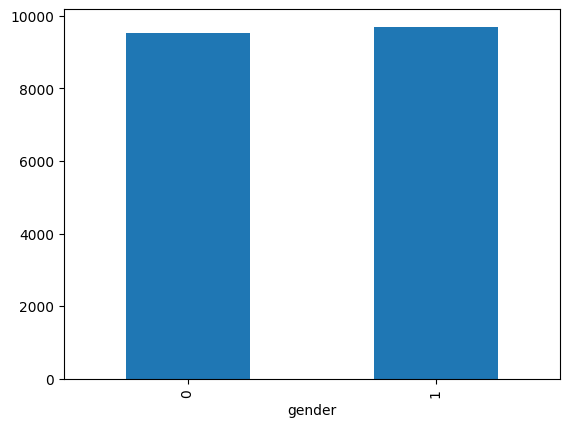

In [21]:
# gender vs credit card debt 
df.groupby('gender')['credit card debt'].mean().plot(kind = 'bar')
plt.show()

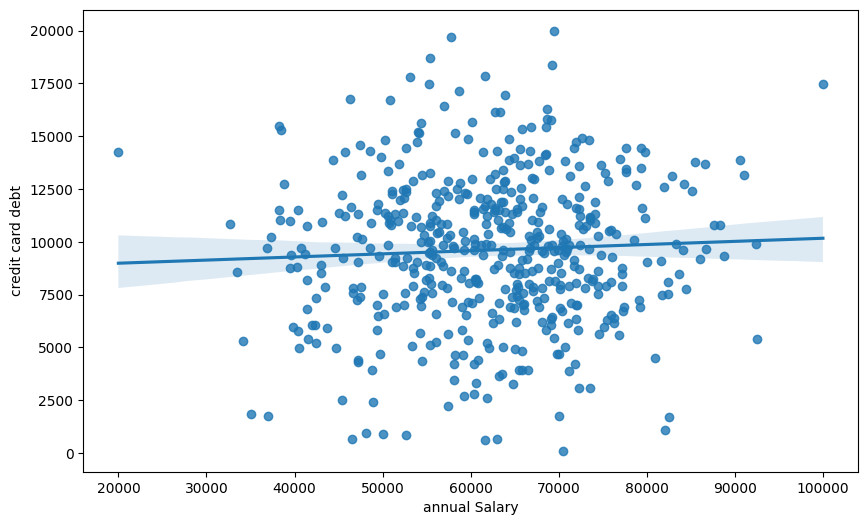

In [22]:
# annual salary vs credit card debt
plt.figure(figsize=(10,6))
sns.regplot(x=df['annual Salary'],y = df['credit card debt'])
plt.show()

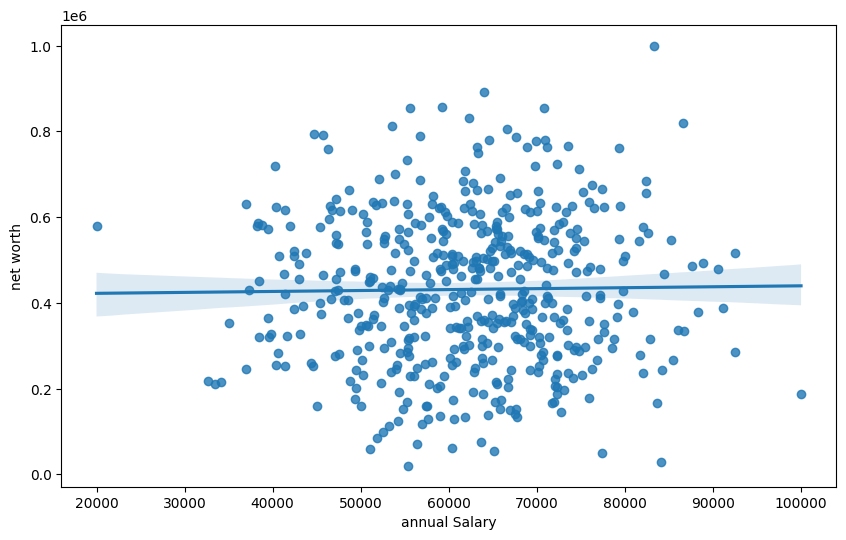

In [23]:
# annual salary vs net worth 
plt.figure(figsize=(10,6))
sns.regplot(x=df['annual Salary'],y = df['net worth'])
plt.show()

In [24]:
# car purchase amount 
df['car purchase amount'].describe()

count      500.000000
mean     44209.292000
std      10773.182684
min       9000.000000
25%      37629.500000
50%      43997.500000
75%      51254.500000
max      80000.000000
Name: car purchase amount, dtype: float64

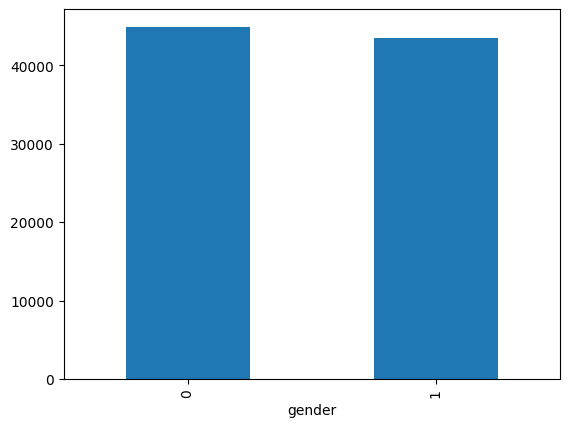

In [25]:
# gender vs car purchase amount 
df.groupby('gender')['car purchase amount'].mean().plot(kind = 'bar')
plt.show()

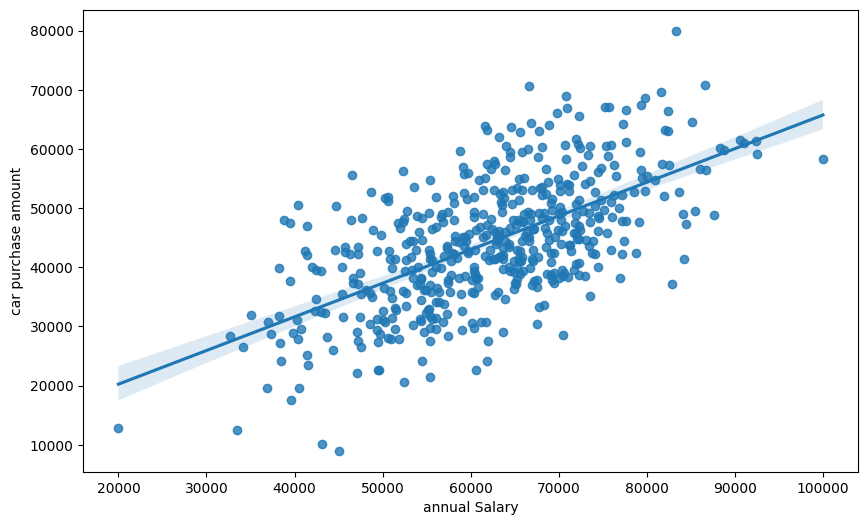

In [26]:
# car purchase amoount vs annual salary
plt.figure(figsize=(10,6))
sns.regplot(x=df['annual Salary'],y = df['car purchase amount'])
plt.show()
# people who earns more also buys more expensive cars

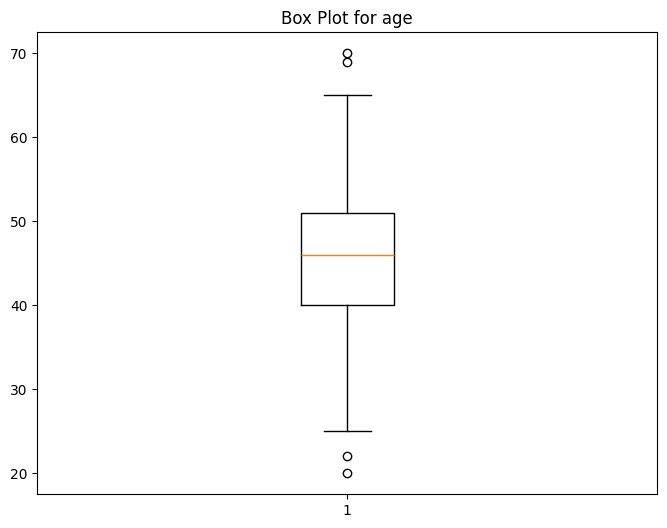

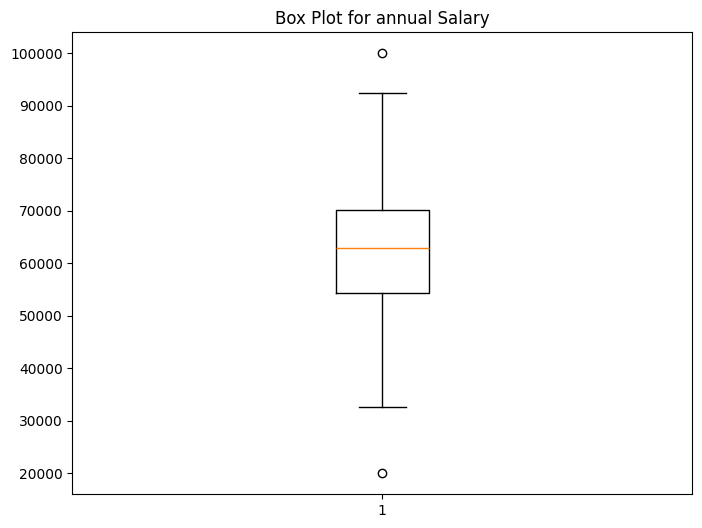

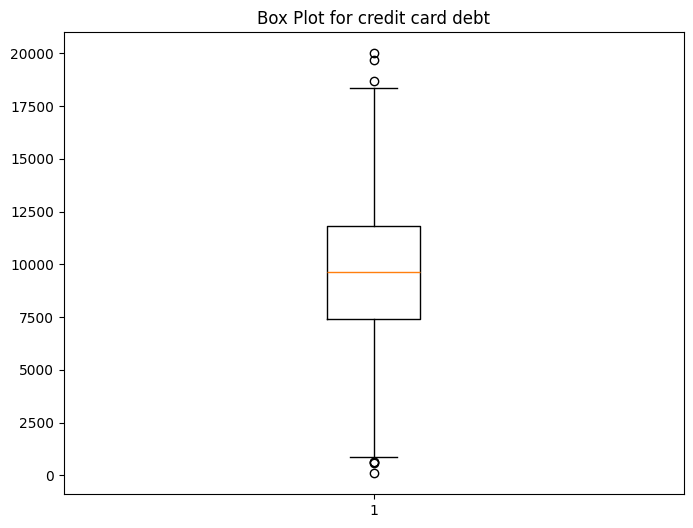

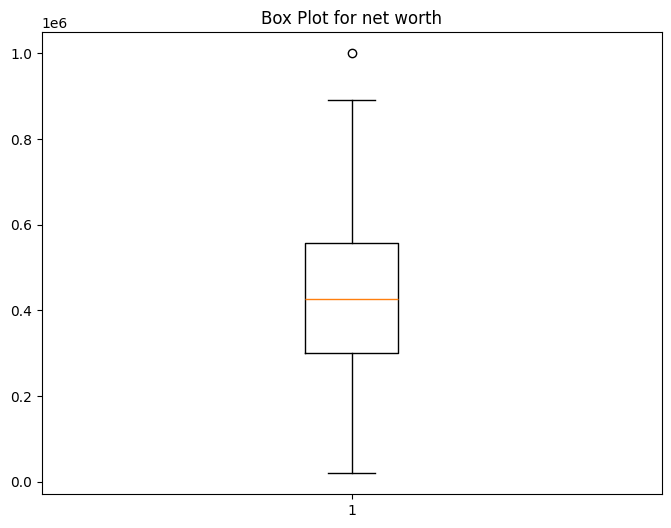

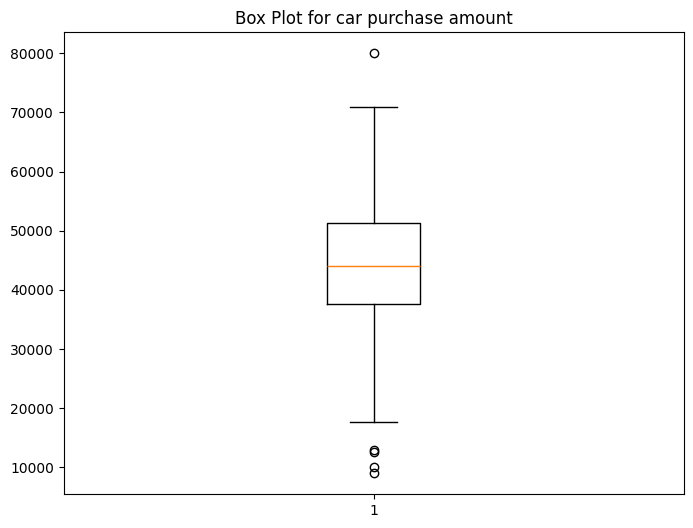

In [27]:
# BOX PLOTS
columns_to_plot = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Plot box plots separately for each column
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

## outliers removel 

#### There are very few ouliers so i am just removing them 

In [28]:
df.shape

(500, 7)

In [29]:
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers
remove_outliers(df)

In [30]:
df.shape

(500, 7)

<Figure size 1200x800 with 0 Axes>

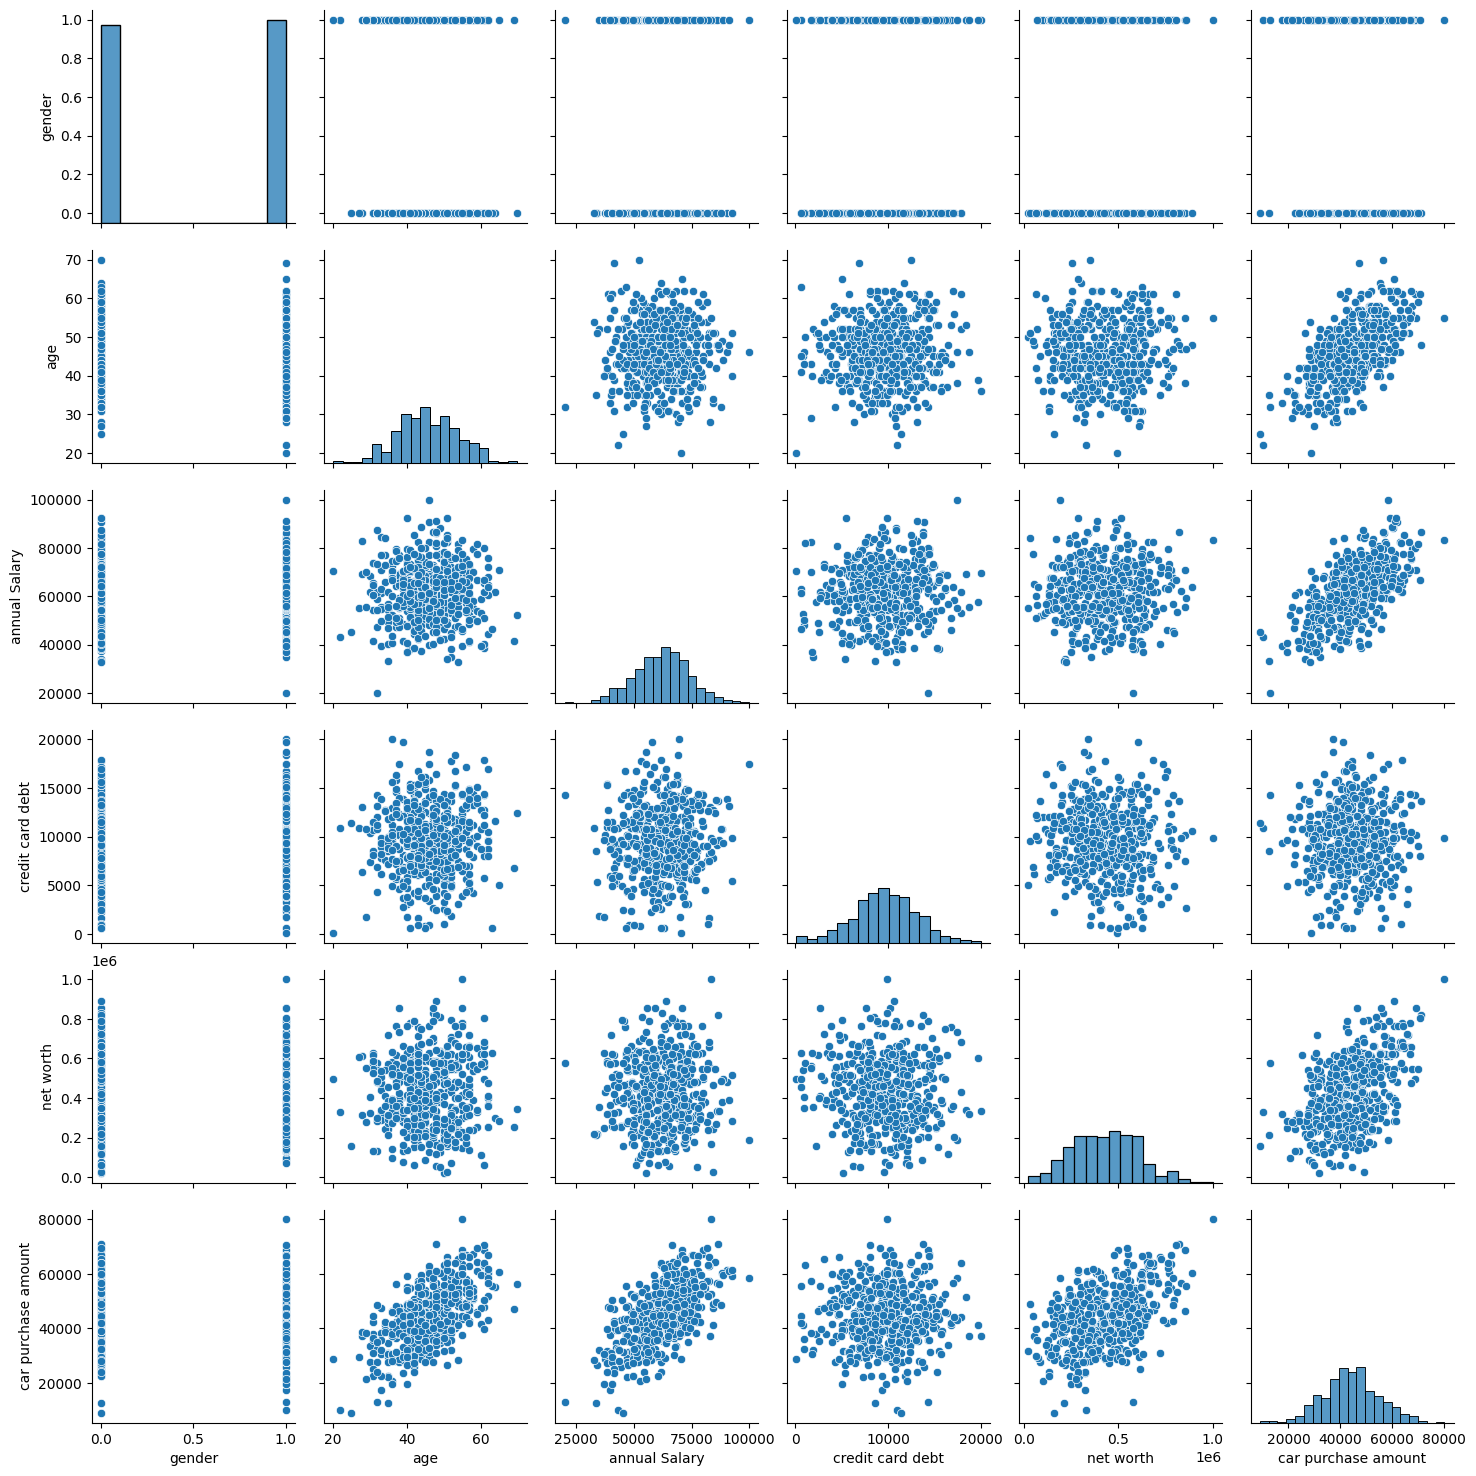

In [31]:
# pair plot
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show()

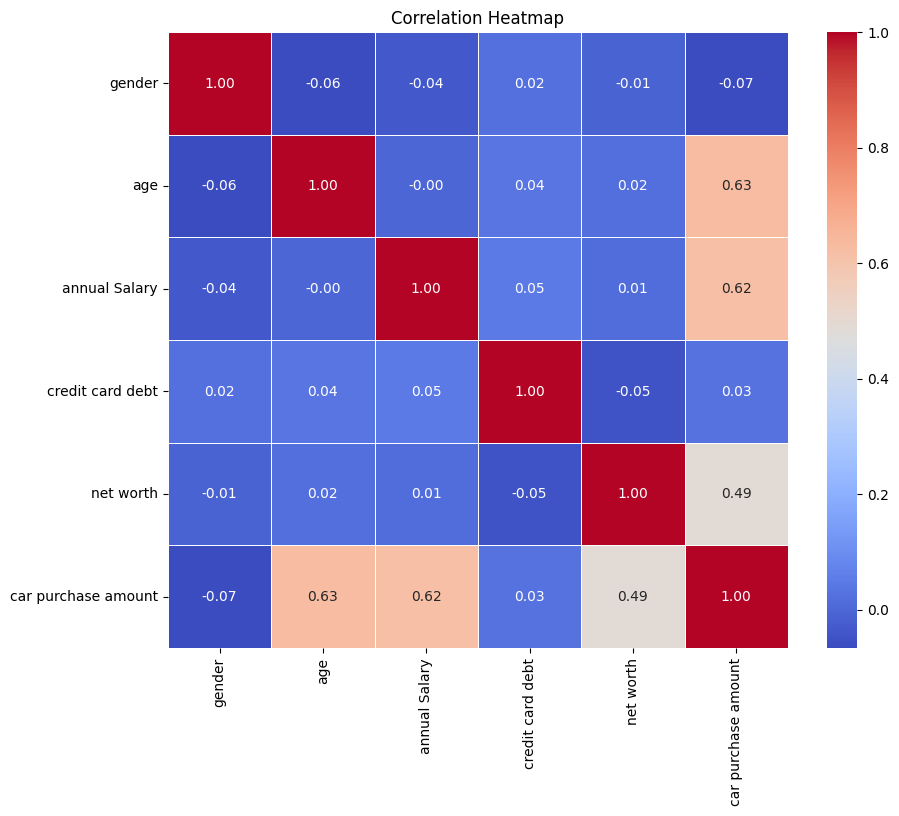

In [32]:
# heatmap
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes('int','float')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap')
plt.show()

In [33]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


# Model building and Evaluation

## Encoding

In [34]:
location_freq = df['country'].value_counts(normalize=True).to_dict()
df['country'] = df['country'].map(location_freq)

In [35]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0.004,0,41,62812,11609,238961,35321
1,0.006,0,40,66646,9572,530973,45115
2,0.010,1,43,53798,11160,638467,42925
3,0.002,1,58,79370,14426,548599,67422
4,0.006,1,57,59729,5358,560304,55915


## Normalization

In [36]:
def normalize_columns(df, columns):
    for col in columns:
        # Min-max normalization: (x - min) / (max - min)
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)

columns_to_normalize = ['age','annual Salary','credit card debt','net worth']

normalize_columns(df, columns_to_normalize)

In [37]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0.004,0,0.42,0.535150,0.578342,0.223430,35321
1,0.006,0,0.40,0.583075,0.475980,0.521401,45115
2,0.010,1,0.46,0.422475,0.555779,0.631089,42925
3,0.002,1,0.76,0.742125,0.719899,0.539387,67422
4,0.006,1,0.74,0.496613,0.264221,0.551331,55915


In [38]:
df.isna().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Linear Regression:
  - Mean Squared Error (MSE): 59912.784313424585
  - Mean Absolute Error (MAE): 208.00540107233022
  - Root Mean Squared Error (RMSE): 244.77088126128194
  - R-squared (R²): 0.9994451124203982



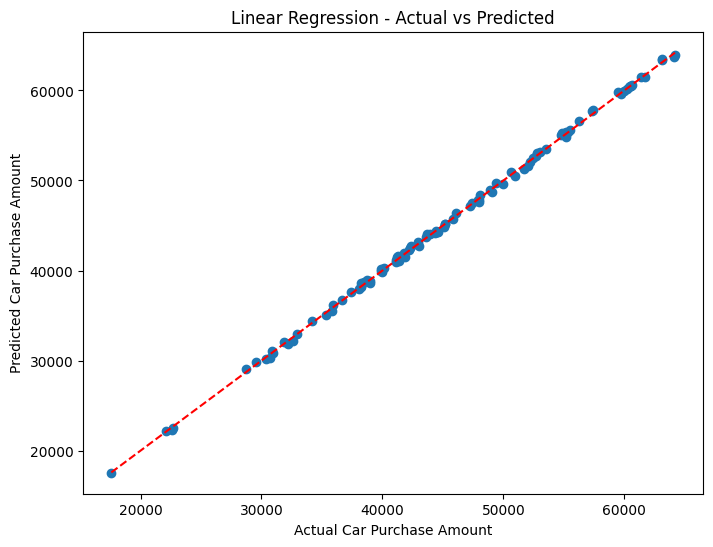

Ridge Regression:
  - Mean Squared Error (MSE): 918705.8040007543
  - Mean Absolute Error (MAE): 780.9218101863221
  - Root Mean Squared Error (RMSE): 958.491420932266
  - R-squared (R²): 0.9914913245012736



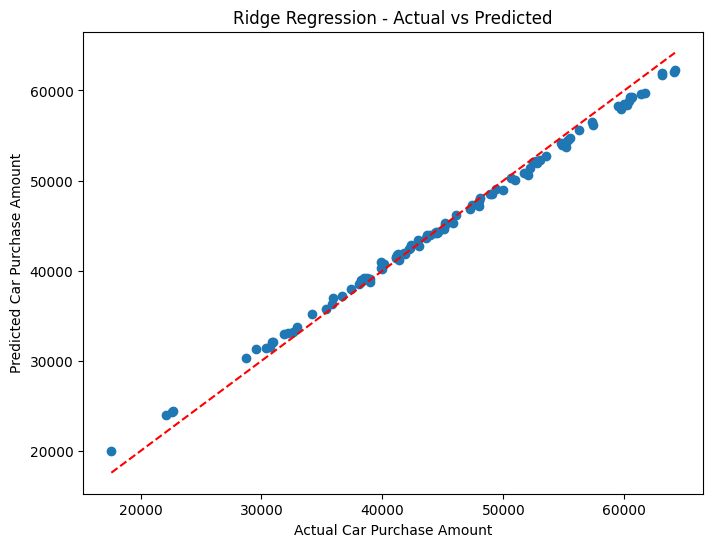

Lasso Regression:
  - Mean Squared Error (MSE): 60177.20865364287
  - Mean Absolute Error (MAE): 210.56882290718787
  - Root Mean Squared Error (RMSE): 245.31043323438746
  - R-squared (R²): 0.9994426634308576



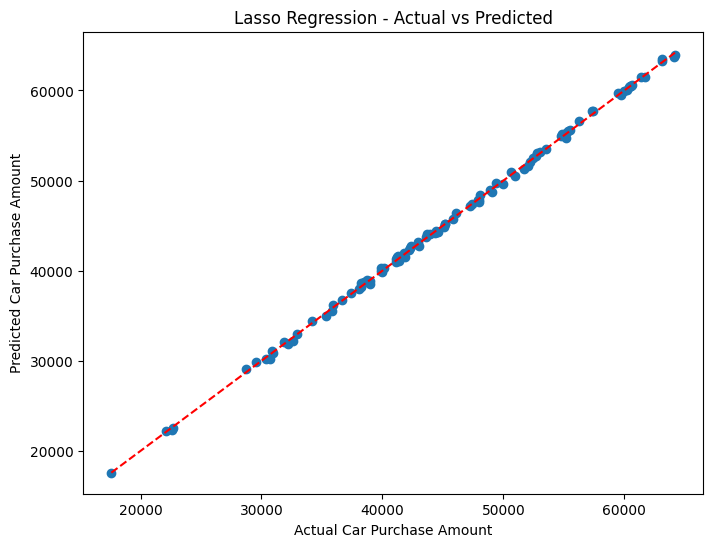

Random Forest:
  - Mean Squared Error (MSE): 5562999.484746997
  - Mean Absolute Error (MAE): 1646.6598999999999
  - Root Mean Squared Error (RMSE): 2358.6011711917295
  - R-squared (R²): 0.9484777855879799



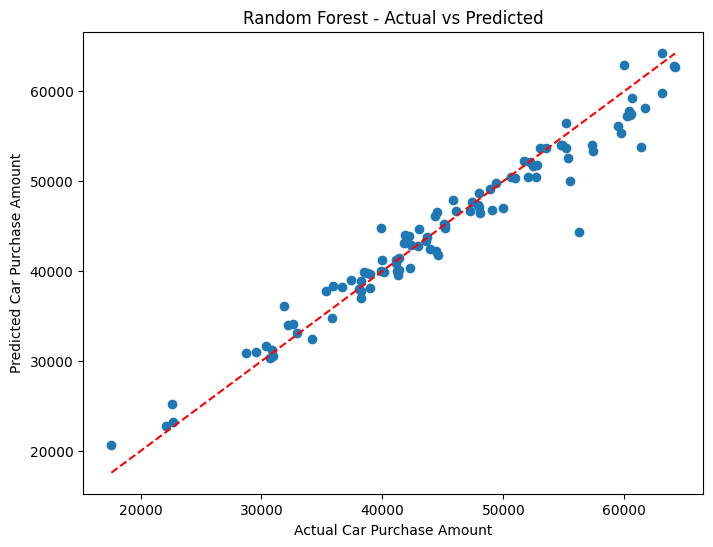

Decision Tree:
  - Mean Squared Error (MSE): 12782625.47
  - Mean Absolute Error (MAE): 2826.05
  - Root Mean Squared Error (RMSE): 3575.2797750665613
  - R-squared (R²): 0.8816125775277073



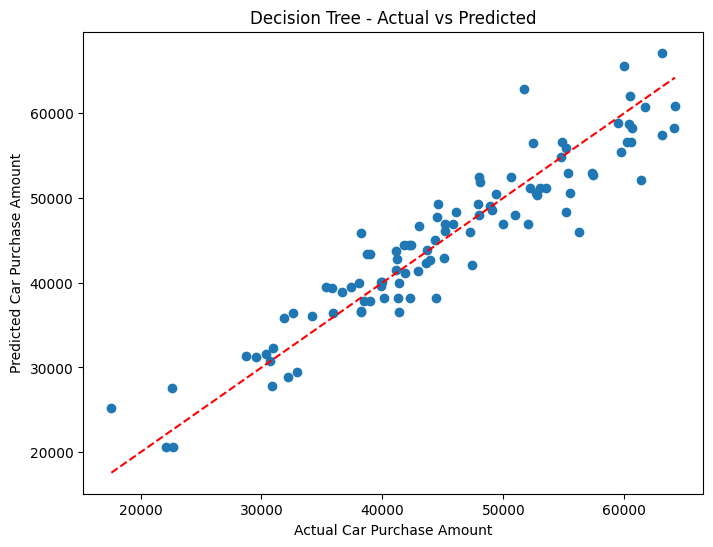

Support Vector Machine:
  - Mean Squared Error (MSE): 109657066.67718275
  - Mean Absolute Error (MAE): 8419.852008309592
  - Root Mean Squared Error (RMSE): 10471.727015023966
  - R-squared (R²): -0.015598674173155747



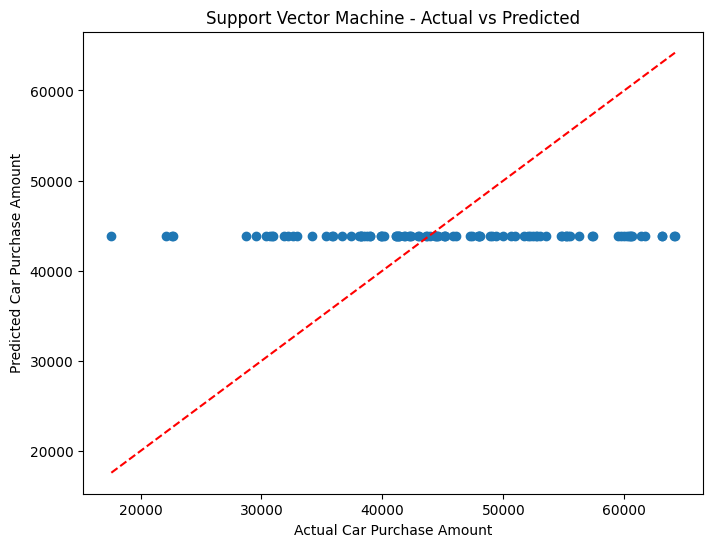

XGBoost:
  - Mean Squared Error (MSE): 6023661.071220216
  - Mean Absolute Error (MAE): 1820.043291015625
  - Root Mean Squared Error (RMSE): 2454.3147864974894
  - R-squared (R²): 0.944211327340998



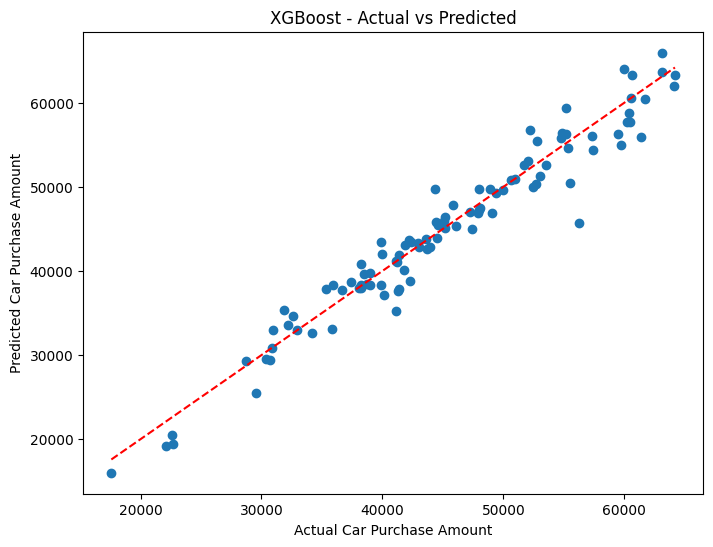

In [47]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

for name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse}")
    print(f"  - R-squared (R²): {r2}")
    print()
    
    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.xlabel('Actual Car Purchase Amount')
    plt.ylabel('Predicted Car Purchase Amount')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()